In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [45]:
df = pd.read_csv('example.csv')

In [46]:
df0 = df[df['Class']==0]
df1 = df[df['Class']==1]

In [47]:
X0 = df0.loc[:,'Time':'Amount']
Y0 = df0.loc[:,'Class']
X1 = df1.loc[:,'Time':'Amount']
Y1 = df1.loc[:,'Class']

In [48]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=0.2, random_state=42) 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [49]:
X_train = pd.concat([X0_train,X1_train])
y_train = pd.concat([y0_train,y1_train])

In [50]:
X_test = pd.concat([X0_test,X1_test])
y_test = pd.concat([y0_test,y1_test])

In [9]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00
38488,39411.0,1.321979,-0.575195,0.395503,-0.551813,-1.172345,-1.036152,-0.417696,-0.228770,-0.819610,...,-0.410389,-0.468705,-0.977936,0.113435,0.396269,0.077504,0.901030,-0.063011,0.017133,43.89
153861,100409.0,-0.342387,-0.196129,1.201254,-1.327419,-0.741833,-0.570306,-0.574235,-0.228333,0.958407,...,-0.165678,0.286212,1.048439,0.128623,-0.054182,-1.689067,-0.481259,-0.063310,0.324558,49.83
20458,31054.0,1.459008,-1.144243,0.673748,-1.305257,-1.850589,-0.944949,-1.130357,-0.113864,-1.557238,...,-0.357991,-0.369531,-0.821023,0.174704,0.294865,0.081690,-0.408069,0.031007,0.030960,35.00
158719,111675.0,-1.210476,-1.186077,1.115949,-0.202103,0.234418,-1.014537,0.338385,0.080021,0.533068,...,0.537182,0.089917,-0.479130,0.692104,-0.132880,-0.075115,-0.610495,-0.090292,0.029432,219.00
10980,18895.0,1.245337,-0.273576,0.683713,-0.766523,-0.472246,0.190399,-0.682182,0.020846,3.017579,...,-0.092208,-0.172927,0.059887,-0.119483,-0.790592,0.543437,-0.647130,0.086450,0.020732,11.85


# 전체

In [23]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 99500456.38494720
Iteration 2, loss = 100960275.76422974
Iteration 3, loss = 100844898.77604832
Iteration 4, loss = 100729653.64022264
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [25]:
mlp.score(X_train,y_train)

0.998275143189449

In [24]:
mlp.score(X_test,y_test)

0.9982444436641972

In [26]:
pred = mlp.predict(X_train)

In [27]:
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,227452,0
True Type 1,393,0


In [29]:
pred = mlp.predict(X_test)

In [30]:
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,56862,1
True Type 1,99,0


# 1개

In [9]:
mlp = MLPClassifier(hidden_layer_sizes = (50,),max_iter=10,alpha=1e-4,solver='sgd',verbose=10,tol=1e-4,random_state=1,learning_rate_init=0.1)

In [10]:
mlp.fit(np.array(X_train['V4']).reshape(-1,1),y_train)

Iteration 1, loss = 0.01046531
Iteration 2, loss = 0.00829360
Iteration 3, loss = 0.00825105
Iteration 4, loss = 0.00822910
Iteration 5, loss = 0.00819455
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [11]:
mlp.score(np.array(X_train['V4']).reshape(-1,1),y_train)

0.9982970879325858

In [13]:
mlp.score(np.array(X_test['V4']).reshape(-1,1),y_test)

0.9981917769741231

In [19]:
pred = mlp.predict(np.array(X_train['V4']).reshape(-1,1))

In [20]:
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,227442,10
True Type 1,378,15


In [21]:
pred = mlp.predict(np.array(X_test['V4']).reshape(-1,1))

In [22]:
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,56857,6
True Type 1,97,2


In [58]:
mlp.fit(np.array(X_train['V7']).reshape(-1,1),y_train)
mlp.score(np.array(X_train['V7']).reshape(-1,1),y_train)

Iteration 1, loss = 0.01141805
Iteration 2, loss = 0.00920923
Iteration 3, loss = 0.00916581
Iteration 4, loss = 0.00910138
Iteration 5, loss = 0.00894813
Iteration 6, loss = 0.00895029
Iteration 7, loss = 0.00889241
Iteration 8, loss = 0.00885864
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.9983146437270952

In [59]:
mlp.score(np.array(X_test['V7']).reshape(-1,1),y_test)

0.9984024437344194

In [33]:
pred = mlp.predict(np.array(X_train['V7']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,227432,20
True Type 1,364,29


In [34]:
pred = mlp.predict(np.array(X_test['V7']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,56858,5
True Type 1,86,13


In [60]:
mlp.fit(np.array(X_train['V9']).reshape(-1,1),y_train)
mlp.score(np.array(X_train['V9']).reshape(-1,1),y_train)

Iteration 1, loss = 0.01128543
Iteration 2, loss = 0.00887521
Iteration 3, loss = 0.00882048
Iteration 4, loss = 0.00875815
Iteration 5, loss = 0.00874954
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.9986087032851281

In [61]:
mlp.score(np.array(X_test['V9']).reshape(-1,1),y_test)

0.9986482216214319

In [62]:
pred = mlp.predict(np.array(X_train['V9']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,227420,32
True Type 1,285,108


In [63]:
pred = mlp.predict(np.array(X_test['V9']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,56856,7
True Type 1,70,29


In [64]:
mlp.fit(np.array(X_train['V10']).reshape(-1,1),y_train)
mlp.score(np.array(X_train['V10']).reshape(-1,1),y_train)

Iteration 1, loss = 0.00814203
Iteration 2, loss = 0.00589506
Iteration 3, loss = 0.00582480
Iteration 4, loss = 0.00582064
Iteration 5, loss = 0.00581156
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.9986920933090478

In [65]:
mlp.score(np.array(X_test['V10']).reshape(-1,1),y_test)

0.9988588883817282

In [66]:
pred = mlp.predict(np.array(X_train['V10']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,227372,80
True Type 1,218,175


In [67]:
pred = mlp.predict(np.array(X_test['V9']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,56861,2
True Type 1,89,10


In [68]:
mlp.fit(np.array(X_train['V11']).reshape(-1,1),y_train)
mlp.score(np.array(X_train['V11']).reshape(-1,1),y_train)

Iteration 1, loss = 0.00878021
Iteration 2, loss = 0.00638912
Iteration 3, loss = 0.00635153
Iteration 4, loss = 0.00630081
Iteration 5, loss = 0.00631004
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.9988149838706138

In [69]:
mlp.score(np.array(X_test['V11']).reshape(-1,1),y_test)

0.9988237772550121

In [70]:
pred = mlp.predict(np.array(X_train['V11']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,227405,47
True Type 1,223,170


In [71]:
pred = mlp.predict(np.array(X_test['V11']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,56853,10
True Type 1,57,42


In [72]:
mlp.fit(np.array(X_train['V12']).reshape(-1,1),y_train)
print(mlp.score(np.array(X_train['V12']).reshape(-1,1),y_train))
print(mlp.score(np.array(X_test['V12']).reshape(-1,1),y_test))

Iteration 1, loss = 0.00795379
Iteration 2, loss = 0.00582934
Iteration 3, loss = 0.00578634
Iteration 4, loss = 0.00573820
Iteration 5, loss = 0.00574599
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.998990541815708
0.9989466661985184


In [74]:
pred = mlp.predict(np.array(X_train['V12']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,227413,39
True Type 1,191,202


In [75]:
pred = mlp.predict(np.array(X_test['V12']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
conf_matrix

,Predicted Type 0,Predicted Type 1
True Type 0,56854,9
True Type 1,51,48


In [76]:
mlp.fit(np.array(X_train['V14']).reshape(-1,1),y_train)
print(mlp.score(np.array(X_train['V14']).reshape(-1,1),y_train))
print(mlp.score(np.array(X_test['V14']).reshape(-1,1),y_test))

pred = mlp.predict(np.array(X_train['V14']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

pred = mlp.predict(np.array(X_test['V14']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

Iteration 1, loss = 0.00699260
Iteration 2, loss = 0.00481129
Iteration 3, loss = 0.00476939
Iteration 4, loss = 0.00477422
Iteration 5, loss = 0.00470595
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.9987579275384582
0.9985253326779256
             Predicted Type 0  Predicted  Type 1
True Type 0            227307                145
True Type 1               138                255
             Predicted Type 0  Predicted  Type 1
True Type 0             56825                 38
True Type 1                46                 53


In [77]:
mlp.fit(np.array(X_train['V16']).reshape(-1,1),y_train)
print(mlp.score(np.array(X_train['V16']).reshape(-1,1),y_train))
print(mlp.score(np.array(X_test['V16']).reshape(-1,1),y_test))

pred = mlp.predict(np.array(X_train['V16']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

pred = mlp.predict(np.array(X_test['V16']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

Iteration 1, loss = 0.00937023
Iteration 2, loss = 0.00715513
Iteration 3, loss = 0.00708910
Iteration 4, loss = 0.00705528
Iteration 5, loss = 0.00702578
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.9988413175623779
0.9988939995084443
             Predicted Type 0  Predicted  Type 1
True Type 0            227413                 39
True Type 1               225                168
             Predicted Type 0  Predicted  Type 1
True Type 0             56858                  5
True Type 1                58                 41


In [78]:
mlp.fit(np.array(X_train['V17']).reshape(-1,1),y_train)
print(mlp.score(np.array(X_train['V17']).reshape(-1,1),y_train))
print(mlp.score(np.array(X_test['V17']).reshape(-1,1),y_test))

pred = mlp.predict(np.array(X_train['V17']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

pred = mlp.predict(np.array(X_test['V17']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

Iteration 1, loss = 0.00854077
Iteration 2, loss = 0.00610882
Iteration 3, loss = 0.00567052
Iteration 4, loss = 0.00554056
Iteration 5, loss = 0.00541879
Iteration 6, loss = 0.00532514
Iteration 7, loss = 0.00522691
Iteration 8, loss = 0.00517008
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.9989642081239439
0.9988939995084443
             Predicted Type 0  Predicted  Type 1
True Type 0            227400                 52
True Type 1               184                209
             Predicted Type 0  Predicted  Type 1
True Type 0             56849                 14
True Type 1                49                 50


In [79]:
mlp.fit(np.array(X_train['V18']).reshape(-1,1),y_train)
print(mlp.score(np.array(X_train['V18']).reshape(-1,1),y_train))
print(mlp.score(np.array(X_test['V18']).reshape(-1,1),y_test))

pred = mlp.predict(np.array(X_train['V18']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

pred = mlp.predict(np.array(X_test['V18']).reshape(-1,1))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

Iteration 1, loss = 0.01131733
Iteration 2, loss = 0.00879933
Iteration 3, loss = 0.00870799
Iteration 4, loss = 0.00869413
Iteration 5, loss = 0.00866970
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.9986833154117931
0.9986306660580738
             Predicted Type 0  Predicted  Type 1
True Type 0            227424                 28
True Type 1               272                121
             Predicted Type 0  Predicted  Type 1
True Type 0             56857                  6
True Type 1                72                 27


# 두 개

In [60]:
mlp = MLPClassifier(hidden_layer_sizes = (50,),max_iter=20,alpha=1e-4,solver='sgd',verbose=10,tol=1e-4,random_state=1,learning_rate_init=0.1)

In [38]:
mlp.fit(X_train[['V17','V10']],y_train)
print(mlp.score(X_train[['V17','V10']],y_train))
print(mlp.score(X_test[['V17','V10']],y_test))

pred = mlp.predict(X_train[['V17','V10']])
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

pred = mlp.predict(X_test[['V17','V10']])
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

Iteration 1, loss = 0.00665827
Iteration 2, loss = 0.00423202
Iteration 3, loss = 0.00413241
Iteration 4, loss = 0.00404861
Iteration 5, loss = 0.00404041
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.9992319339902126
0.9992802219023208
             Predicted Type 0  Predicted  Type 1
True Type 0            227388                 64
True Type 1               111                282
             Predicted Type 0  Predicted  Type 1
True Type 0             56845                 18
True Type 1                23                 76


In [39]:
fpr, tpr, _ = roc_curve(y_test, mlp.predict(X_test[['V17','V10']]))

ROC AUC: 0.88


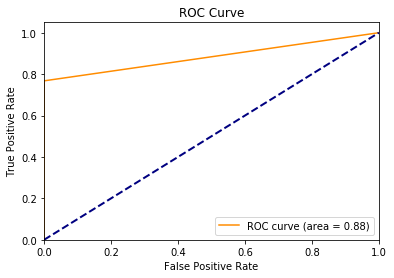

In [40]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 3개

# 여러 개

In [41]:
mlp.fit(X_train[['V4','V7','V9','V10','V11','V12','V14','V16','V17','V18']],y_train)
print(mlp.score(X_train[['V4','V7','V9','V10','V11','V12','V14','V16','V17','V18']],y_train))
print(mlp.score(X_test[['V4','V7','V9','V10','V11','V12','V14','V16','V17','V18']],y_test))

pred = mlp.predict(X_train[['V4','V7','V9','V10','V11','V12','V14','V16','V17','V18']])
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

pred = mlp.predict(X_test[['V4','V7','V9','V10','V11','V12','V14','V16','V17','V18']])
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

Iteration 1, loss = 0.00575415
Iteration 2, loss = 0.00326734
Iteration 3, loss = 0.00306290
Iteration 4, loss = 0.00297124
Iteration 5, loss = 0.00287937
Iteration 6, loss = 0.00281284
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.9994294366784436
0.9993328885923949
             Predicted Type 0  Predicted  Type 1
True Type 0            227401                 51
True Type 1                79                314
             Predicted Type 0  Predicted  Type 1
True Type 0             56845                 18
True Type 1                20                 79


In [42]:
fpr, tpr, _ = roc_curve(y_test, mlp.predict(X_test[['V4','V7','V9','V10','V11','V12','V14','V16','V17','V18']]))

ROC AUC: 0.90


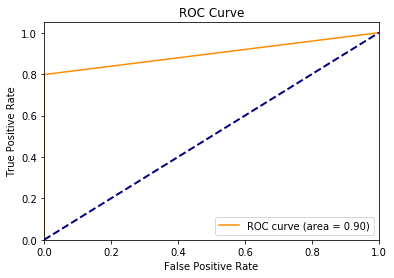

In [43]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
from mpl_toolkits.mplot3d import Axes3D

In [52]:
sample0 = df0.sample(492)
sample1 = df1

c:\users\renz\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  # This is added back by InteractiveShellApp.init_path()
c:\users\renz\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


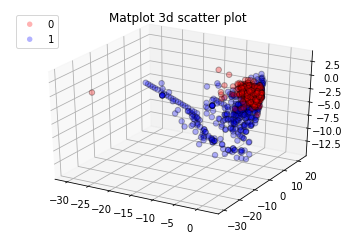

In [73]:
data0 = (np.array(sample0['V1']),np.array(sample0['V2']),np.array(sample0['V16']))
data1 = (np.array(sample1['V1']),np.array(sample1['V2']),np.array(sample1['V16']))
data = (data0,data1)

groups = (0,1)
colors = ('red','blue')

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')
 
for data, color, group in zip(data, colors, groups):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.3, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot 3d scatter plot')
plt.legend(loc=2)
plt.show()

In [70]:
mlp.fit(X_train[['V1','V2','V13']],y_train)
print(mlp.score(X_train[['V1','V2','V13']],y_train))
print(mlp.score(X_test[['V1','V2','V13']],y_test))

pred = mlp.predict(X_train[['V1','V2','V13']])
conf_matrix = pd.DataFrame(
    confusion_matrix(y_train, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

pred = mlp.predict(X_test[['V1','V2','V13']])
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Type 0', 'Predicted  Type 1'],
    index=['True Type 0', 'True Type 1']
)
print(conf_matrix)

Iteration 1, loss = 0.01349301
Iteration 2, loss = 0.00997932
Iteration 3, loss = 0.00915418
Iteration 4, loss = 0.00875945
Iteration 5, loss = 0.00861528
Iteration 6, loss = 0.00853636
Iteration 7, loss = 0.00847034
Iteration 8, loss = 0.00840464
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.9984463121859158
0.9986306660580738
             Predicted Type 0  Predicted  Type 1
True Type 0            227423                 29
True Type 1               325                 68
             Predicted Type 0  Predicted  Type 1
True Type 0             56862                  1
True Type 1                77                 22
